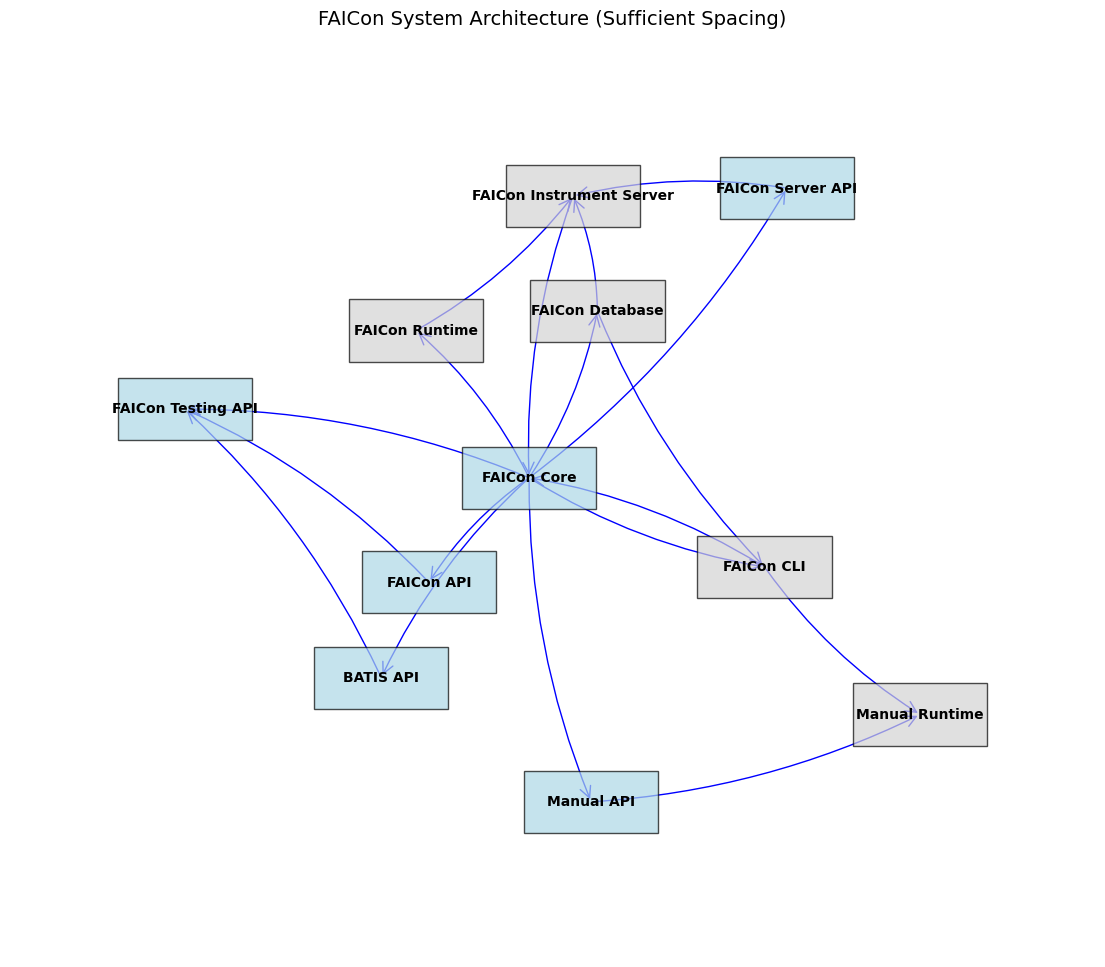

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the nodes
nodes = [
    "FAICon Instrument Server",
    "FAICon Server API",
    "FAICon Runtime",
    "FAICon Database",
    "FAICon CLI",
    "FAICon Core",
    "Manual Runtime",
    "Manual API",
    "FAICon Testing API",
    "BATIS API",
    "FAICon API"
]

# Define the directed edges
edges = [
    ("FAICon Server API", "FAICon Instrument Server"),
    ("FAICon Core", "FAICon Server API"),
    ("FAICon Runtime", "FAICon Instrument Server"),
    ("FAICon Database", "FAICon Instrument Server"),
    ("FAICon Core", "FAICon CLI"),
    ("FAICon Database", "FAICon CLI"),
    ("FAICon Core", "FAICon Runtime"),
    ("Manual API", "Manual Runtime"),
    ("FAICon Core", "Manual API"),
    ("BATIS API", "FAICon Testing API"),
    ("FAICon Core", "FAICon Testing API"),
    ("FAICon API", "FAICon Testing API"),
    ("FAICon Core", "BATIS API"),
    ("FAICon Core", "FAICon API"),
    ("FAICon CLI", "Manual Runtime"),
    ("FAICon Core", "FAICon Database"),
    ("FAICon CLI", "FAICon Core"),
    ("FAICon Instrument Server", "FAICon Core")
]

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Choose a layout algorithm
pos = nx.spring_layout(G, seed=42, k=0.8)  # Increased k for more spacing

# Define node colors
node_colors = []
for node in G.nodes():
    if "API" in node or "Core" in node:
        node_colors.append("lightblue")
    elif "Runtime" in node or "Server" in node or "CLI" in node or "Database" in node:
        node_colors.append("lightgray")
    else:
        node_colors.append("white")

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))  # Increased figure size
ax.axis('off')

# Define box properties
box_width = 2.5  # Slightly larger boxes
box_height = 1
arrow_style = dict(arrowstyle='->', color='blue', lw=1, mutation_scale=20,
                   connectionstyle='arc3,rad=0.1')  # Single arrowprops

# Draw the boxes and labels
node_positions = {}
for node, (x, y) in pos.items():
    scaled_x = x * 7  # Increased scaling
    scaled_y = y * 7  # Increased scaling
    node_positions[node] = (scaled_x, scaled_y)

    rect = patches.Rectangle((scaled_x - box_width / 2, scaled_y - box_height / 2), box_width, box_height,
                             linewidth=1, edgecolor='black', facecolor=node_colors[nodes.index(node)], alpha=0.7)
    ax.add_patch(rect)
    ax.text(scaled_x, scaled_y, node, ha='center', va='center', fontsize=10, fontweight='bold')

# Draw the arrows
for u, v in edges:
    pos_u = node_positions[u]
    pos_v = node_positions[v]
    ax.annotate("", xy=pos_v, xytext=pos_u, arrowprops=arrow_style, zorder=-1)

# Set plot limits with more padding
all_x = [x for x, y in node_positions.values()]
all_y = [y for x, y in node_positions.values()]
padding = 2
ax.set_xlim(min(all_x) - box_width / 2 - padding, max(all_x) + box_width / 2 + padding)
ax.set_ylim(min(all_y) - box_height / 2 - padding, max(all_y) + box_height / 2 + padding)

plt.title("FAICon System Architecture (Sufficient Spacing)", fontsize=14)
plt.show()

Theoretical Ground State Energy:
0.499999984375
Simulated Ground State Energy:
0.3382814771104044


(array([   2.,    0.,    0.,    5.,   12.,   22.,   61., 1116., 1201.,
        1283., 1265., 1289., 1237., 1327., 1298., 1285., 1238., 1257.,
        1254., 1236., 1175.,  363.,   43.,   22.,    4.,    3.,    0.,
           0.,    0.,    2.]),
 array([-1.9952049 , -1.85446751, -1.71373012, -1.57299272, -1.43225533,
        -1.29151794, -1.15078054, -1.01004315, -0.86930576, -0.72856837,
        -0.58783097, -0.44709358, -0.30635619, -0.16561879, -0.0248814 ,
         0.11585599,  0.25659339,  0.39733078,  0.53806817,  0.67880557,
         0.81954296,  0.96028035,  1.10101774,  1.24175514,  1.38249253,
         1.52322992,  1.66396732,  1.80470471,  1.9454421 ,  2.0861795 ,
         2.22691689]),
 <BarContainer object of 30 artists>)

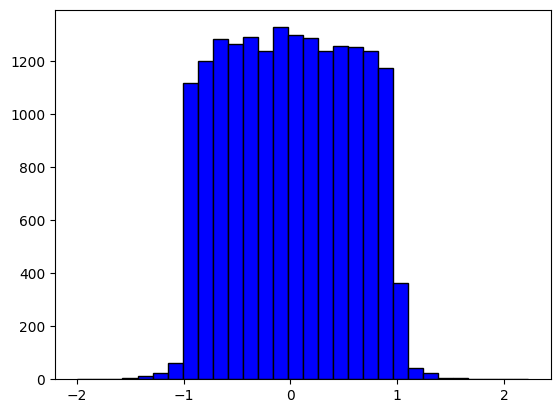

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0
mu = 1.0
N = 20000
a = 0.0005
n_steps = 200000
del_t =N*a
disc = 2000 #Thermalization parameter, discards path values before certain point

# Potential Term
def V(x):
    return 0.5 * mu**2 * x**2

#Small Change in Action
def Del_Action(x, i):
    return a * (0.5 * m * ((x[i+1] - x[i]) / a)**2 + V(x[i]))

# Function to Test Change in xs
def Kick(x, i):
    new_x1 = x[i] + np.random.uniform(-.5, .5)
    new_x2 = x[i+1] + np.random.uniform(-.5, .5)
    return new_x1, new_x2

# Initialize path
path = np.random.uniform(-1, 1, N)
# path[0] = path[-1] = 0
path[0] = path[-2]  # Approximate periodic boundary
path[1] = path[-1]


for j in range(n_steps):
        i = np.random.randint(1, N - 2)
    
        dS1 = Del_Action(path, i)
    
        old_x1 = path[i]
        old_x2 = path[i+1]
    
        # Propose new values
        new_x1, new_x2 = Kick(path, i)
        path[i] = new_x1
        path[i+1] = new_x2
    
        dS2 = Del_Action(path, i)
        delta_S = np.abs(dS2 - dS1)
    
        # Metropolis Test
        if np.random.rand() > min(1, np.exp(-delta_S)):
            path[i] = old_x1
            path[i+1] = old_x2

    #Theoretical Energies
omega = mu/np.sqrt(m)*(1-((mu**2*a**2)/(8*m)))
print('Theoretical Ground State Energy:')
print(.5*omega)
    
#Simulated Energy
E_0 = mu**2 * np.mean(path[disc:N-1]**2)
print('Simulated Ground State Energy:')
print(E_0)
    
plt.hist(path[disc:], bins=30, color='blue', edgecolor='black' )

In [21]:

uel = [.5]*2
uasss = [.5]*5
uatt = [.7]






pres_w = .1 
att_w = .1 
ass_w = .5
eng_w = .25
meet_w = .05

_avg = lambda x: sum(x)/len(x)

def get_score(unkowns):
    uel = unkowns[:2]
    uasss = unkowns[2:7]
    uatt = [unkowns[-1]]
    engage_learning = [.85,.85,0.0,0.0,.85,0.0,.91,0.0,]+uel

    assignments = [.7,.83,.7,.7,.8,]+uasss
    att = []+uatt
    pres = [.8]
    meet = [1.0]
    return _avg(engage_learning)*eng_w + _avg(assignments)*ass_w + _avg(pres)*pres_w + _avg(meet)*meet_w + _avg(att)*att_w

get_score([.763]*6 + [.8])

0.7137500000000001